# Root-Finding Methods

**Student:** Altynay Yertay
**Selected Function (Function 9):**

f(x) = e^x - 3x

## Imports & Helper Functions

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [211]:
def f(x):
    return np.exp(x) - 3*x

def df(x):
    return np.exp(x) - 3

def g(x):
    return np.exp(x) / 3

## Table printer

In [212]:
def print_table(table, header=("n", "x_n", "f(x_n)", "error")):
    print(f"{header[0]}\t{header[1]}\t\t{header[2]}\t\t{header[3]}")
    for r in table:
        print(f"{r[0]}\t{r[1]:.6f}\t{r[2]:+.6f}\t{r[3]:.6f}")

## Plot helpers

In [213]:
def plot_function_and_root(f, root, title, xmin=0, xmax=1.2):
    X = np.linspace(xmin, xmax, 400)
    plt.figure(figsize=(7,5))
    plt.plot(X, f(X))
    plt.axhline(0, color="black")
    if root is not None:
        plt.scatter(root, f(root), color="red")
        plt.text(root, f(root)+0.02, f"root ≈ {root:.6f}", ha="center")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()

def plot_convergence(errors, title, ylabel="Error"):
    plt.figure(figsize=(6,4))
    plt.plot(errors, marker='o')
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

## Bisection Method

The Bisection Method is a bracketing method that repeatedly halves the interval
containing the root. It always converges if the initial interval is valid.

Bisection Method
Root estimate: 0.619140625
Iterations: 9
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.500000	+0.148721	0.500000
2	0.750000	-0.133000	0.250000
3	0.625000	-0.006754	0.125000
4	0.562500	+0.067555	0.062500
5	0.593750	+0.029516	0.031250
6	0.609375	+0.011156	0.015625
7	0.617188	+0.002145	0.007812
8	0.621094	-0.002319	0.003906
9	0.619141	-0.000091	0.001953


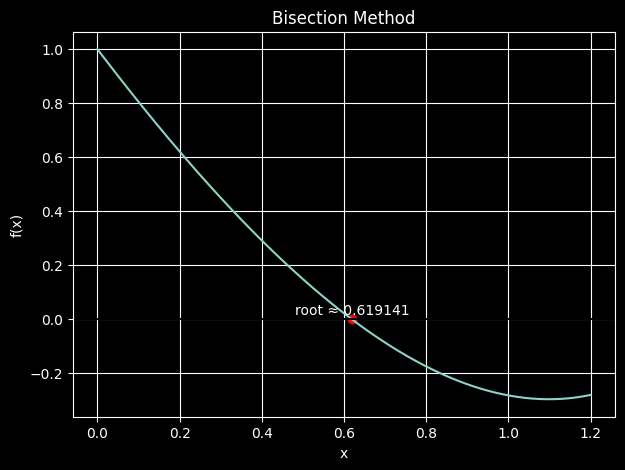

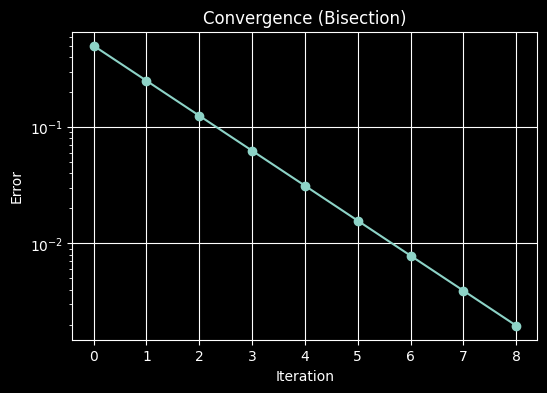

In [214]:
def bisection(f, a, b, eps=1e-3, Nmax=100):

    if a >= b:
        return None, [], "invalid interval order"

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    if f(a) * f(b) > 0:
        return None, [], "invalid interval (no sign change)"

    table = []

    for n in range(1, Nmax + 1):
        c = (a + b) / 2
        error = (b - a) / 2
        table.append([n, c, f(c), error])

        if error < eps or abs(f(c)) < eps:
            return c, table, "tolerance reached"

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c, table, "max iterations reached"

root, table_b, reason = bisection(f, 0, 1)

print("Bisection Method")
print("Root estimate:", root)
print("Iterations:", len(table_b))
print("Stop reason:", reason, "\n")

print_table(table_b)

plot_function_and_root(f, root, "Bisection Method")
plot_convergence([r[3] for r in table_b], "Convergence (Bisection)")

**Limitations:**
The Bisection Method is a robust and reliable root-finding algorithm because it guarantees convergence as long as the initial interval contains a sign change. However, its main limitation is **slow convergence**. The interval width is reduced by a fixed factor of 2 at each iteration, which results in linear convergence. As a consequence, a relatively large number of iterations is required to achieve high accuracy compared to open methods. Additionally, the method requires prior knowledge of an interval where the function changes sign, which may not always be easy to determine in practice.

### False Position (Regula Falsi) Method

The False Position (Regula Falsi) method is a bracketing method that uses
linear interpolation instead of midpoint selection.

False Position Method
Root estimate: 0.61948531037289
Iterations: 6
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.780203	-0.158694	0.158694
2	0.673347	-0.059252	0.059252
3	0.635682	-0.018736	0.018736
4	0.623991	-0.005611	0.005611
5	0.620509	-0.001653	0.001653
6	0.619485	-0.000484	0.000484


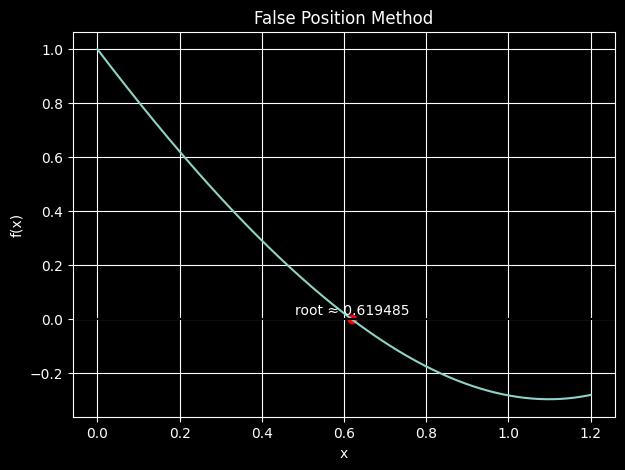

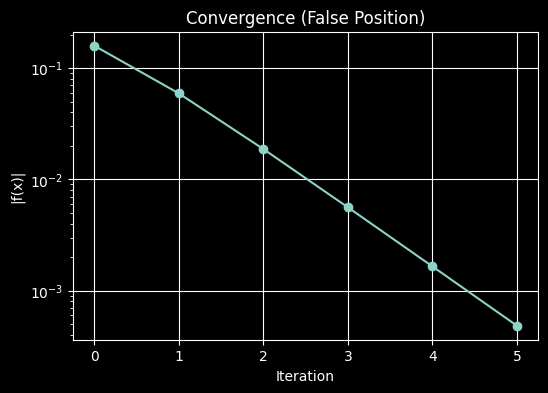

In [215]:
def false_position(f, a, b, eps=1e-3, Nmax=100):

    if a >= b:
        return None, [], "invalid interval order"

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    fa, fb = f(a), f(b)
    if fa*fb > 0:
        return None, [], "invalid interval (no sign change)"

    table = []

    for n in range(1, Nmax+1):

        if fb - fa == 0:
            return None, table, "division by zero"

        c = (a*fb - b*fa)/(fb - fa)
        fc = f(c)
        table.append([n, c, fc, abs(fc)])

        if abs(fc) < eps:
            return c, table, "tolerance reached"

        if fa*fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc

    return c, table, "max iterations reached"

root_f, table_f, reason_f = false_position(f, 0, 1)

print("False Position Method")
print("Root estimate:", root_f)
print("Iterations:", len(table_f))
print("Stop reason:", reason_f, "\n")

print_table(table_f)

plot_function_and_root(f, root_f, "False Position Method")
plot_convergence([r[3] for r in table_f], "Convergence (False Position)", "|f(x)|")

**Limitations:**
The False Position Method improves upon the Bisection Method by using a linear interpolation instead of a midpoint, often resulting in faster convergence. Nevertheless, the method may suffer from **endpoint stagnation**, where one endpoint of the interval remains fixed for many iterations. This can slow down convergence significantly, especially when the function is highly nonlinear near one endpoint. Like all bracketing methods, it also requires an initial interval with opposite signs of the function values.

### Fixed Point Iteration Method

This method rewrites the equation in the form \(x = g(x)\)
and iteratively applies the function until convergence.

Fixed Point Iteration
Root estimate: 0.617685986239335
Iterations: 9
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.549574	+0.083793	0.049574
2	0.577505	+0.049073	0.027931
3	0.593862	+0.029382	0.016358
4	0.603657	+0.017824	0.009794
5	0.609598	+0.010898	0.005941
6	0.613231	+0.006695	0.003633
7	0.615462	+0.004125	0.002232
8	0.616837	+0.002546	0.001375
9	0.617686	+0.001573	0.000849


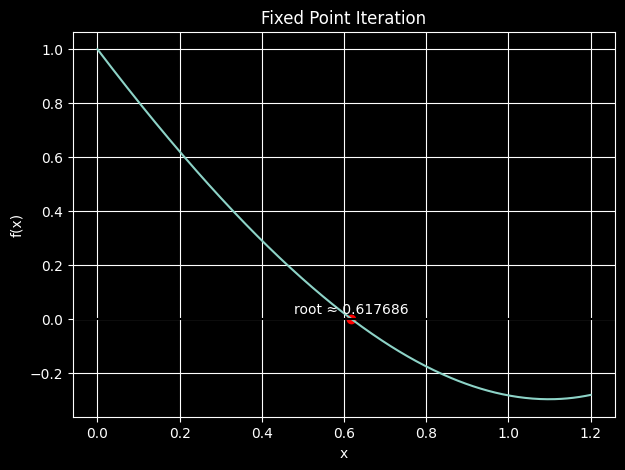

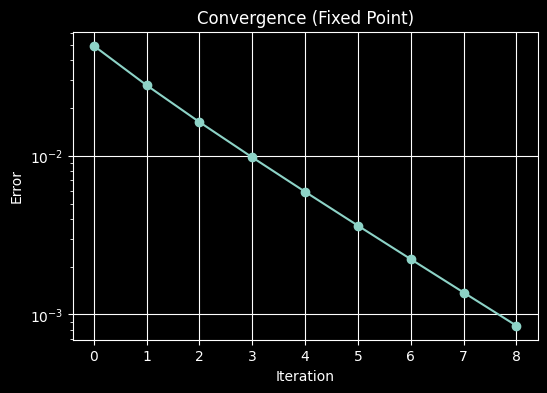

In [216]:
def fixed_point(g, f, x0, eps=1e-3, Nmax=100):

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    table = []
    x = x0

    for n in range(1, Nmax+1):
        x_new = g(x)
        error = abs(x_new - x)
        table.append([n, x_new, f(x_new), error])

        if error < eps:
            return x_new, table, "tolerance reached"

        x = x_new

    return x, table, "max iterations reached"

root_fp, table_fp, reason_fp = fixed_point(g, f, 0.5)

print("Fixed Point Iteration")
print("Root estimate:", root_fp)
print("Iterations:", len(table_fp))
print("Stop reason:", reason_fp, "\n")

print_table(table_fp)

plot_function_and_root(f, root_fp, "Fixed Point Iteration")
plot_convergence([r[3] for r in table_fp], "Convergence (Fixed Point)")

**Limitations:**
The Fixed Point Iteration method is simple to implement and computationally inexpensive per iteration. However, its convergence strongly depends on the choice of the iteration function g(x). In the condition |g'(x)|<1 is not satisfied near the root, the method may converge very slowly or even diverge. Compared to other methods, Fixed Point Iteration typically converges **slower** and is more sensitive to the initial guess, making it less reliable without proper theoretical analysis.

### Newton–Raphson Method

Newton’s method uses the derivative of the function to achieve
quadratic convergence near the root.

Newton–Raphson Method
Root estimate: 0.6190612833553127
Iterations: 3
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.610060	+0.010362	0.110060
2	0.618997	+0.000074	0.008937
3	0.619061	+0.000000	0.000065


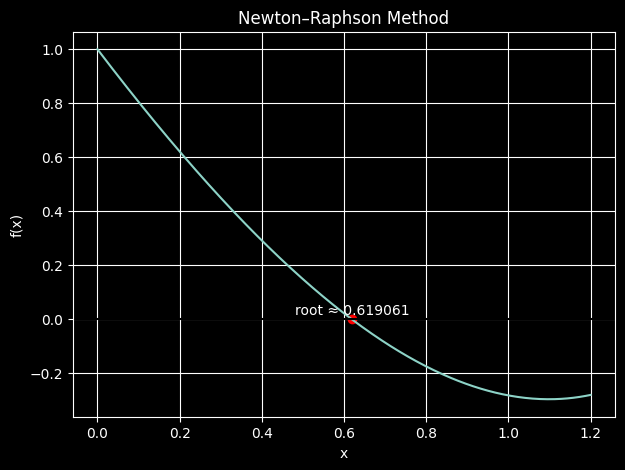

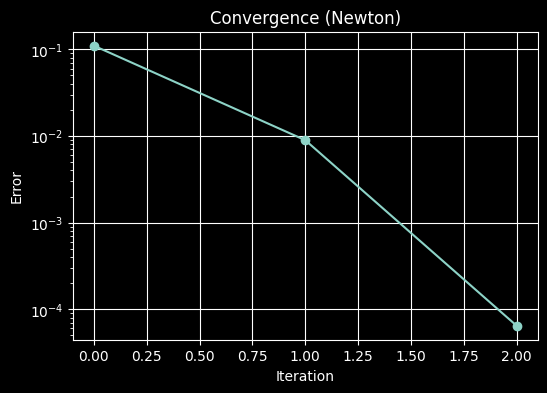

In [217]:
def newton(f, df, x0, eps=1e-3, Nmax=100):

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    table = []
    x = x0

    for n in range(1, Nmax+1):
        if df(x) == 0:
            return None, table, "derivative is zero"

        x_new = x - f(x)/df(x)
        error = abs(x_new - x)
        table.append([n, x_new, f(x_new), error])

        if error < eps:
            return x_new, table, "tolerance reached"

        x = x_new

    return x, table, "max iterations reached"

root_n, table_n, reason_n = newton(f, df, 0.5)

print("Newton–Raphson Method")
print("Root estimate:", root_n)
print("Iterations:", len(table_n))
print("Stop reason:", reason_n, "\n")

print_table(table_n)

plot_function_and_root(f, root_n, "Newton–Raphson Method")
plot_convergence([r[3] for r in table_n], "Convergence (Newton)")

**Limitations:**
The Newton–Raphson Method is highly efficient and exhibits quadratic convergence when the initial guess is sufficiently close to the root. However, it requires the computation of the derivative, which may be difficult or impossible for some functions. The method may also fail if the derivative is zero or very small near the current approximation. Additionally, a poor initial guess can lead to divergence or convergence to an unintended root.

### Secant Method

The Secant Method approximates the derivative numerically
using two previous points.

Secant Method
Root estimate: 0.6190613123803635
Iterations: 6
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.780203	-0.158694	0.219797
2	0.496679	+0.153218	0.283524
3	0.635952	-0.019037	0.139274
4	0.620560	-0.001711	0.015392
5	0.619040	+0.000024	0.001520
6	0.619061	-0.000000	0.000021


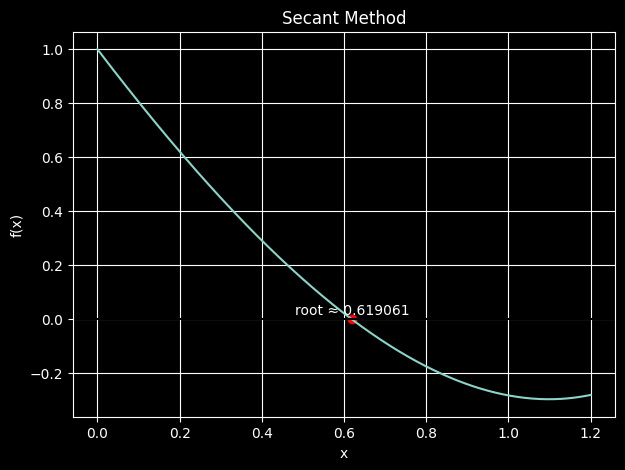

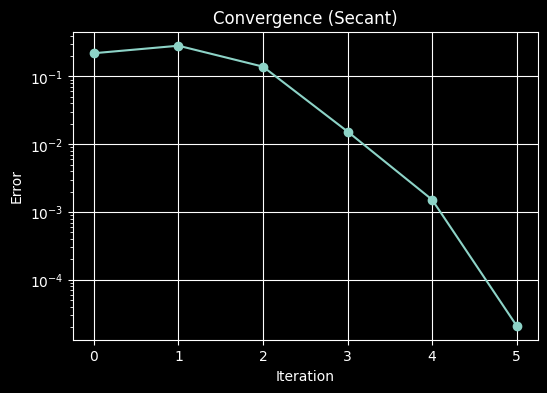

In [218]:
def secant(f, x0, x1, eps=1e-3, Nmax=100):

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    table = []

    for n in range(1, Nmax+1):
        denom = f(x1) - f(x0)
        if denom == 0:
            return None, table, "division by zero"

        x2 = x1 - f(x1)*(x1-x0)/denom
        error = abs(x2 - x1)
        table.append([n, x2, f(x2), error])

        if error < eps:
            return x2, table, "tolerance reached"

        x0, x1 = x1, x2

    return x2, table, "max iterations reached"

root_s, table_s, reason_s = secant(f, 0, 1)

print("Secant Method")
print("Root estimate:", root_s)
print("Iterations:", len(table_s))
print("Stop reason:", reason_s, "\n")

print_table(table_s)

plot_function_and_root(f, root_s, "Secant Method")
plot_convergence([r[3] for r in table_s], "Convergence (Secant)")


**Limitations:**
The Secant Method eliminates the need for explicit derivative computation by approximating it numerically, making it more practical than Newton’s method in some cases. However, it does not guarantee convergence and is sensitive to the choice of initial guesses. If consecutive function values become equal, division by zero may occur. Although its convergence is faster than Fixed Point Iteration, it is generally slower and less stable than Newton’s method.

### Muller's Method

Muller’s Method uses quadratic interpolation
and can converge faster than the Secant Method.

Muller Method
Root estimate: 0.6190612014402672
Iterations: 3
Stop reason: tolerance reached 

n	x_n		f(x_n)		error
1	0.626549	-0.008505	0.373451
2	0.618961	+0.000114	0.007588
3	0.619061	+0.000000	0.000100


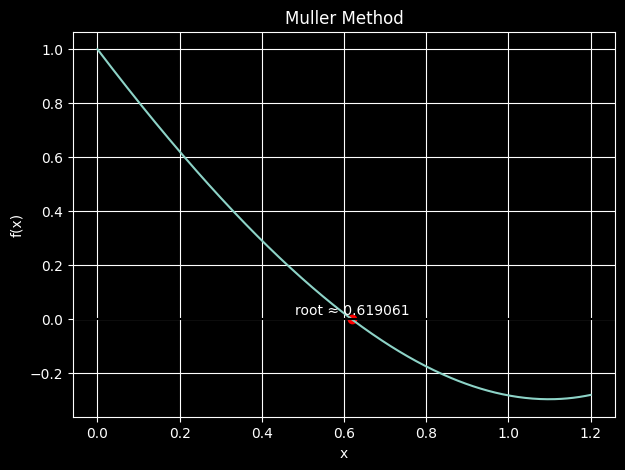

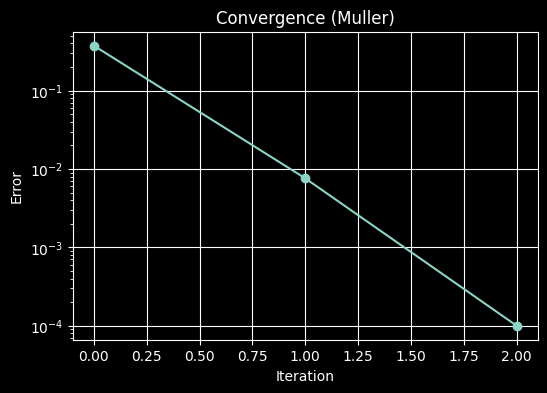

In [219]:
def muller(f, x0, x1, x2, eps=1e-3, Nmax=100):

    if not (x0 < x1 < x2):
        return None, [], "invalid initial points order"

    if eps <= 0:
        return None, [], "invalid tolerance"

    if Nmax <= 0:
        return None, [], "invalid max iterations"

    table = []

    for n in range(1, Nmax+1):
        f0, f1, f2 = f(x0), f(x1), f(x2)
        h0, h1 = x1-x0, x2-x1

        if h0 == 0 or h1 == 0:
            return None, table, "division by zero"

        d0 = (f1-f0)/h0
        d1 = (f2-f1)/h1

        a = (d1-d0)/(h1+h0)
        b = a*h1 + d1
        c = f2

        D = np.sqrt(b*b - 4*a*c)
        denom = b + D if abs(b+D) > abs(b-D) else b - D

        if denom == 0:
            return None, table, "division by zero"

        x3 = x2 - 2*c/denom
        error = abs(x3 - x2)
        table.append([n, x3, f(x3), error])

        if error < eps:
            return x3, table, "tolerance reached"

        x0, x1, x2 = x1, x2, x3

    return x3, table, "max iterations reached"

root_m, table_m, reason_m = muller(f, 0, 0.5, 1)

print("Muller Method")
print("Root estimate:", root_m)
print("Iterations:", len(table_m))
print("Stop reason:", reason_m, "\n")

print_table(table_m)

plot_function_and_root(f, root_m, "Muller Method")
plot_convergence([r[3] for r in table_m], "Convergence (Muller)")

**Limitations:**
Muller’s Method uses quadratic interpolation and often converges faster than the Secant Method. Despite its efficiency, the algorithm is more complex and computationally expensive per iteration. The method may generate complex intermediate values if the discriminant becomes negative, which can complicate implementation and interpretation. Additionally, Muller’s Method requires three initial points, and poor selection of these points can lead to instability or divergence.

### Comparison Summary

The table below compares the performance of all methods.

In [220]:
pd.DataFrame({
    "Method": ["Bisection", "False Position", "Fixed Point", "Newton", "Secant", "Muller"],
    "Iterations": [
        len(table_b),
        len(table_f),
        len(table_fp),
        len(table_n),
        len(table_s),
        len(table_m)
    ]
})

,Method,Iterations
0,Bisection,9
1,False Position,6
2,Fixed Point,9
3,Newton,3
4,Secant,6
5,Muller,3


### Overall Conclusion

All six numerical methods were applied to solve the nonlinear equation
f(x) = e^x − 3x.

Bracketing methods are robust but slow, while open methods converge faster
but depend on initial guesses or derivatives.

The numerical results confirm the theoretical convergence behavior
of each method.